<a href="https://colab.research.google.com/github/aimanuel/JupyterNotebook/blob/main/4_Tensorflow_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [ ]:
filepath = '/content/drive/MyDrive/13. Python/Machine Learning/TensorFlow_FILES/DATA/cancer_classification.csv'

In [ ]:
df = pd.read_csv(filepath)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


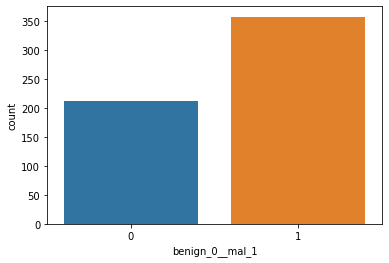

In [ ]:
sns.countplot(x='benign_0__mal_1',data=df)

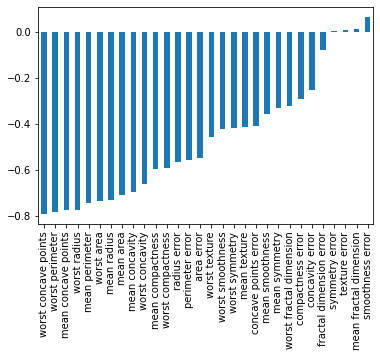

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
X_train.shape

(426, 30)

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6471 - val_loss: 0.6027
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5865 - val_loss: 0.5354
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5272 - val_loss: 0.4772
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4718 - val_loss: 0.4243
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4222 - val_loss: 0.3752
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3842 - val_loss: 0.3338
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3418 - val_loss: 0.3084
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3158 - val_loss: 0.2751
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2895 - val_loss: 0.2505
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2678 - val_loss: 0.2322
Epoch 11

In [ ]:
losses = pd.DataFrame(model.history.history)

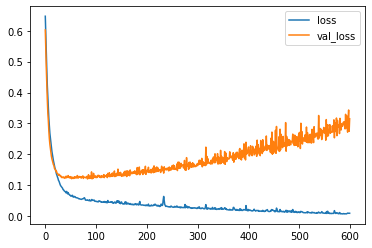

In [ ]:
# when val_loss is aligned with loss, we can continue training it (higher epoch)
# BUT WHEN val_loss spiking higher than loss, it means we're OVER FITTING the model
# this is overfitting, it occurs around epochs below 50s
losses.plot()

In [ ]:
model2 = Sequential()

model2.add(Dense(30,activation='relu'))
model2.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION
model2.add(Dense(1,activation='sigmoid'))

model2.compile(optimizer='adam',loss='binary_crossentropy')

# EARLY STOPPING

In [ ]:
# this early stopping will prevent overfitting by create
# a stop when epochs get out of control
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# patience = 25, is the amount of epochs that still goin
# even after it detected by stopping 1st time. (a.k.a stopper + 25)
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model2.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
           callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6718 - val_loss: 0.6498
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6392 - val_loss: 0.6234
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6124 - val_loss: 0.5935
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5824 - val_loss: 0.5622
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5478 - val_loss: 0.5213
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5036 - val_loss: 0.4771
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4628 - val_loss: 0.4337
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4181 - val_loss: 0.3908
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3759 - val_loss: 0.3430
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3354 - val_loss: 0.3061
Epoch 11

In [ ]:
losses2 = pd.DataFrame(model2.history.history)

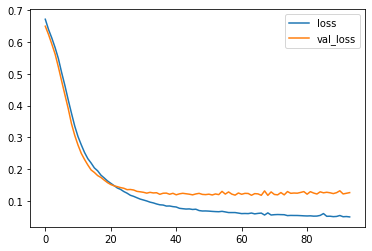

In [ ]:
# the early stop was triggered bcs it begins to spreading more
losses2.plot()

# DROPOUT

Dropout is a technique used to prevent a model from overfitting. Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase. 

Dropout can help a model generalize by randomly setting the output for a given neuron to 0. In setting the output to 0, the cost function becomes more sensitive to neighbouring neurons changing the way the weights will be updated during the process of backpropagation.

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model3 = Sequential()

# common value 0.2 ~ 0.5, means 0.5 of the neuron (30) will be turned
# off randomly
model3.add(Dense(30,activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(15,activation='relu'))
model3.add(Dropout(0.5))

# BINARY CLASSIFICATION
model3.add(Dense(1,activation='sigmoid'))

model3.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
early_stop2 = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model3.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
           callbacks=[early_stop2])

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.7144 - val_loss: 0.6827
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6884 - val_loss: 0.6730
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6712 - val_loss: 0.6603
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6567 - val_loss: 0.6414
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6435 - val_loss: 0.6215
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6186 - val_loss: 0.5937
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6020 - val_loss: 0.5642
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5889 - val_loss: 0.5350
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5511 - val_loss: 0.5016
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5479 - val_loss: 0.4728
Epoch 11

In [ ]:
losses3 = pd.DataFrame(model3.history.history)

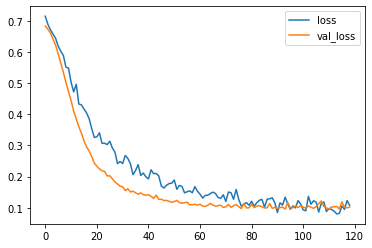

In [ ]:
# by turning off some neurons, we can achieve flattening out at the
# same rate.

losses3.plot()

In [ ]:
# since model.predict_classes deprecated by 2021, we replace this.
predictions = (model3.predict(X_test) >0.5).astype("int32")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [ ]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
